# **Imports**

In [1]:
import os
from PIL import Image
import shutil
import matplotlib.pyplot as plt
import pandas as pd

# **Parameters**

In [2]:
MIN_IMG_IN_SERIES = 2000
MIN_YEAR = 2014

# **Extract Data**
Extract Data to src/ectracted_data

In [3]:
data = {
    "model": [],
    "count": []
    }

In [4]:
def select_images(source_folder, destination_folder):

    # create destination folder
    if os.path.exists(destination_folder):
        shutil.rmtree(destination_folder)
    os.makedirs(destination_folder, exist_ok=True)

    for make in os.listdir(source_folder):
        print(f"Starting {make} ...")
        make_path = os.path.join(source_folder, make)
        if os.path.isdir(make_path):
            # iterate through makes
            for series in os.listdir(make_path):
                data["model"].append(f"{make}-{series}")
                series_path = os.path.join(make_path, series)
                # iterate through serieses
                series_img_count = 0
                for year in os.listdir(series_path):
                            year_path = os.path.join(series_path, year)
                            # iterate through years
                            if os.path.isdir(year_path) and int(year) > MIN_YEAR:    
                                for color in os.listdir(year_path):
                                    color_path = os.path.join(year_path, color)
                                    # iterate through colors
                                    if os.path.isdir(color_path):
                                        for file in os.listdir(color_path):
                                            # add images to destination folder#
                                            series_img_count += 1

                data_img_count = 0
                if series_img_count > MIN_IMG_IN_SERIES:
                    if os.path.isdir(series_path):
                        for year in os.listdir(series_path):
                            year_path = os.path.join(series_path, year)
                            # iterate through years
                            if os.path.isdir(year_path) and int(year) > MIN_YEAR:    
                                for color in os.listdir(year_path):
                                    color_path = os.path.join(year_path, color)
                                    # iterate through colors
                                    if os.path.isdir(color_path):
                                        for file in os.listdir(color_path):
                                            # add images to destination folder#
                                            data_img_count += 1
                                            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                                                try:
                                                    img_path = os.path.join(color_path, file)
                                                    img = Image.open(img_path)
                                                    img.verify()

                                                    shutil.copy(img_path, destination_folder)

                                                except (IOError, SyntaxError) as e:
                                                    print(f"Datei {file} ist kein gültiges Bild und wird übersprungen.")

                data["count"].append(data_img_count)
        else:
            print(f"dir not found {make_path}")
        
        print(f"Finished {make}!")

source_folder = '../src/data/dvm-car-models/makes'  
destination_folder = '../src/final_data'  

select_images(source_folder, destination_folder)

Starting BMW ...
Finished BMW!
Starting Mercedes-Benz ...
Finished Mercedes-Benz!
Starting Porsche ...
Finished Porsche!
Starting Volkswagen ...
Finished Volkswagen!


In [5]:
folder_path = '../src/final_data'

image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')

image_count = 0

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith(image_extensions):
            image_count += 1

print(f'Total number of images: {image_count}')

Total number of images: 57141


In [6]:
print(data)

{'model': ['BMW-1 Series', 'BMW-2 Series', 'BMW-2 Series Active Tourer', 'BMW-2 Series Gran Tourer', 'BMW-3 Series', 'BMW-3 Series Gran Turismo', 'BMW-4 Series', 'BMW-4 Series Gran Coupe', 'BMW-5 Series', 'BMW-5 Series Gran Turismo', 'BMW-6 Series', 'BMW-6 Series Gran Coupe', 'BMW-6 Series Gran Turismo', 'BMW-7 Series', 'BMW-Alpina B10', 'BMW-Alpina D3', 'BMW-Alpina D3 Bi-Turbo', 'BMW-Alpina D4', 'BMW-Alpina D5 Bi-Turbo', 'BMW-Alpina Roadster', 'BMW-Alpina Unspecified Models', 'BMW-i3', 'BMW-i8', 'BMW-M2', 'BMW-M3', 'BMW-M4', 'BMW-M5', 'BMW-M6', 'BMW-M6 Gran Coupe', 'BMW-X1', 'BMW-X2', 'BMW-X3', 'BMW-X4', 'BMW-X5', 'BMW-X5M', 'BMW-X6', 'BMW-X6M', 'BMW-Z3', 'BMW-Z3M', 'BMW-Z4', 'BMW-Z4M', 'BMW-Z8', 'Mercedes-Benz-200', 'Mercedes-Benz-220', 'Mercedes-Benz-230', 'Mercedes-Benz-320', 'Mercedes-Benz-350', 'Mercedes-Benz-500', 'Mercedes-Benz-A Class', 'Mercedes-Benz-AMG', 'Mercedes-Benz-Amg Gt', 'Mercedes-Benz-B Class', 'Mercedes-Benz-C Class', 'Mercedes-Benz-Citan', 'Mercedes-Benz-Citan Tra

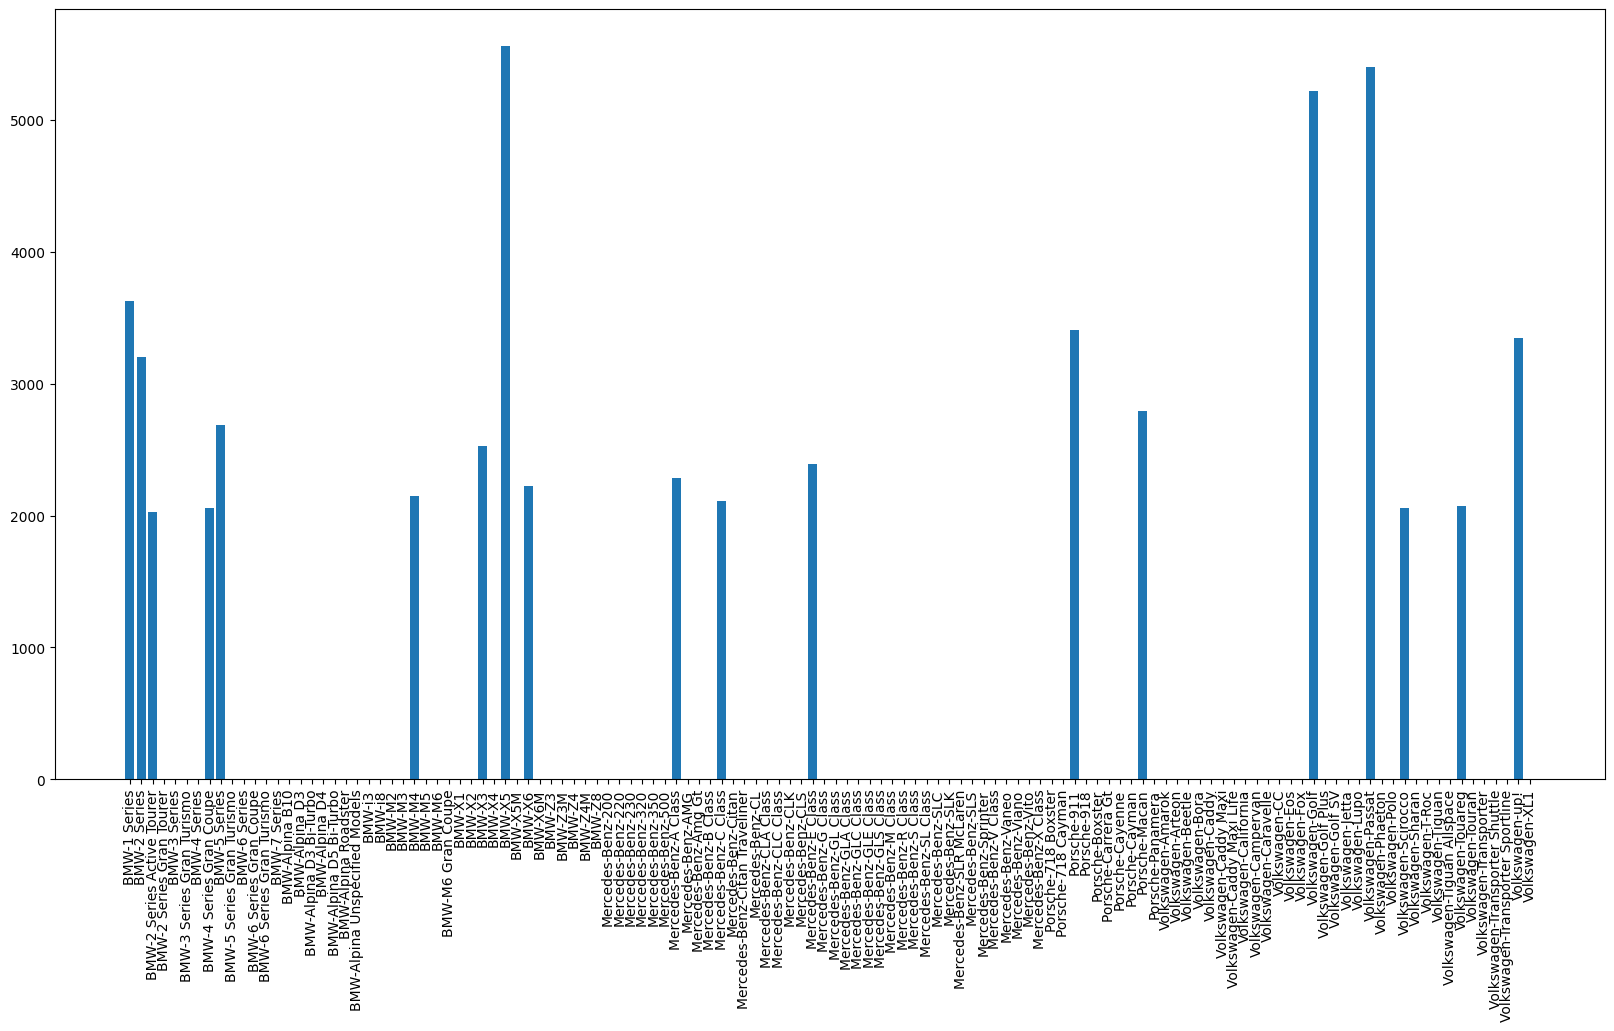

In [7]:
plt.figure(figsize=(20, 10))
plt.bar(data["model"], data["count"])
plt.xticks(rotation=90)

plt.show()

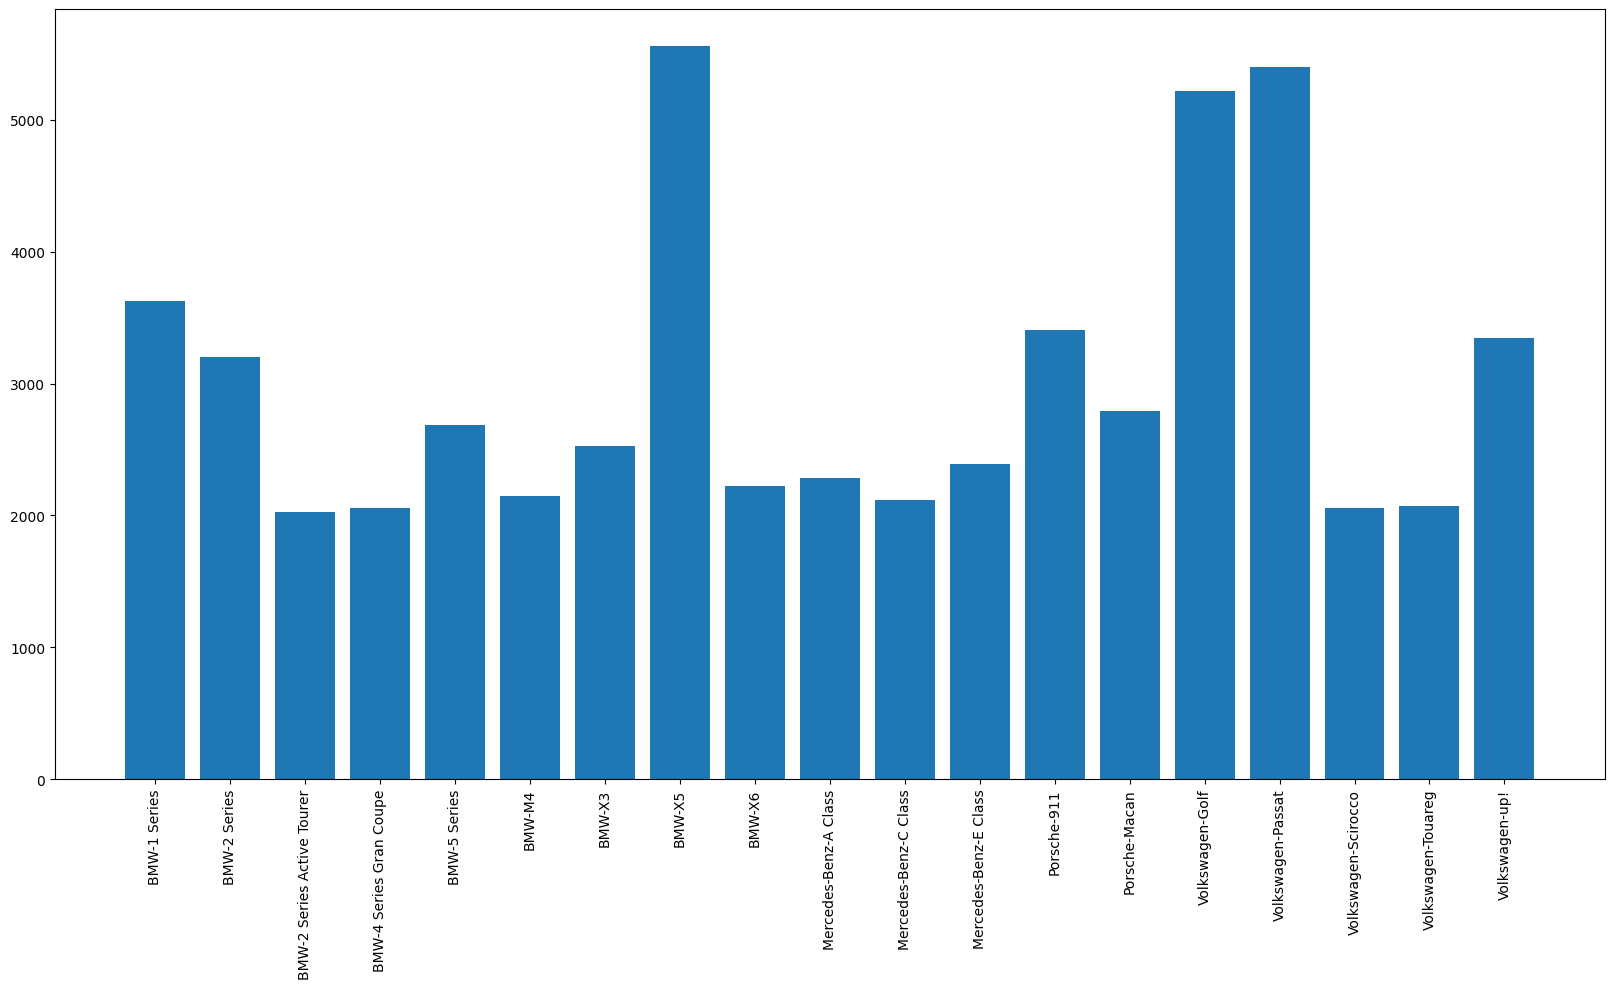

In [8]:
filtered_models = []
filtered_count = []
for index in range(len(data["count"])):
    if data["count"][index] > MIN_IMG_IN_SERIES:
        filtered_models.append(data["model"][index])
        filtered_count.append(data["count"][index])

plt.figure(figsize=(20, 10))
plt.bar(filtered_models, filtered_count)
plt.xticks(rotation=90)

plt.show()

# **Create Lookup Table for extratced data**

In [9]:
def extract_metadata_from_filename(filename):
    parts = filename.split('$$')
    if len(parts) != 7:
        print(f"Error with file: {filename}")
        return None  
    return {
        'CarMake': parts[0],
        'Model': parts[1],
        'Year': parts[2],
        'Color': parts[3],
        'Info': parts[4],
        'ID': parts[5],
        'Filename': filename
    }

def create_lookup_table(image_folder):
    metadata_list = []
    
    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')):
            metadata = extract_metadata_from_filename(filename)
            if metadata:
                metadata_list.append(metadata)

    df = pd.DataFrame(metadata_list)
    
    csv_file = "../src/meta_data.csv"
    df.to_csv(csv_file, index=False)
    print(f"CSV file saved to {csv_file}")

In [10]:
image_folder = '../src/final_data'
create_lookup_table(image_folder)

CSV file saved to ../src/meta_data.csv


In [11]:
pd.read_csv("../src/meta_data.csv").head(50)

,CarMake,Model,Year,Color,Info,ID,Filename
0,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_0...
1,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_1...
2,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_1...
3,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_2...
4,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_3...
5,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_3...
6,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_4...
7,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_5...
8,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_6...
9,BMW,1 Series,2015,Black,8_1,1108,BMW$$1 Series$$2015$$Black$$8_1$$1108$$image_7...


In [12]:
del filtered_count
del filtered_models